![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Cumulatives per year
</b>
</span>

---
**Notebook version**: `1` (8 Sep 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plot cumulative sums per year
- Includes option to
        - highlight specific year
        - calculate and show a reference
        - exclude specific years from reference        

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.cumulative import CumulativeYear

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


</br>

# **Load example data**

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.051 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


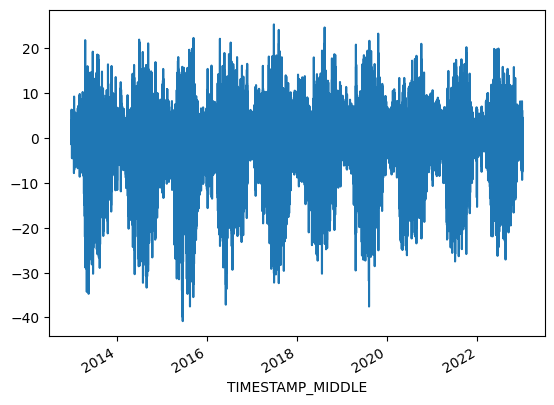

In [2]:
data_df = load_exampledata_parquet()
series = data_df['NEE_CUT_REF_f'].copy()
series.plot(x_compat=True);

</br>

# **Plot yearly cumulative sums**

In [3]:
# The series is the CO2 ecosystem flux, convert to more approriate units for yearly sums
series = series.multiply(0.02161926)  # umol CO2 m-2 s-1 --> g C m-2 30min-1
series_units = r'($\mathrm{gC\ m^{-2}}$)'

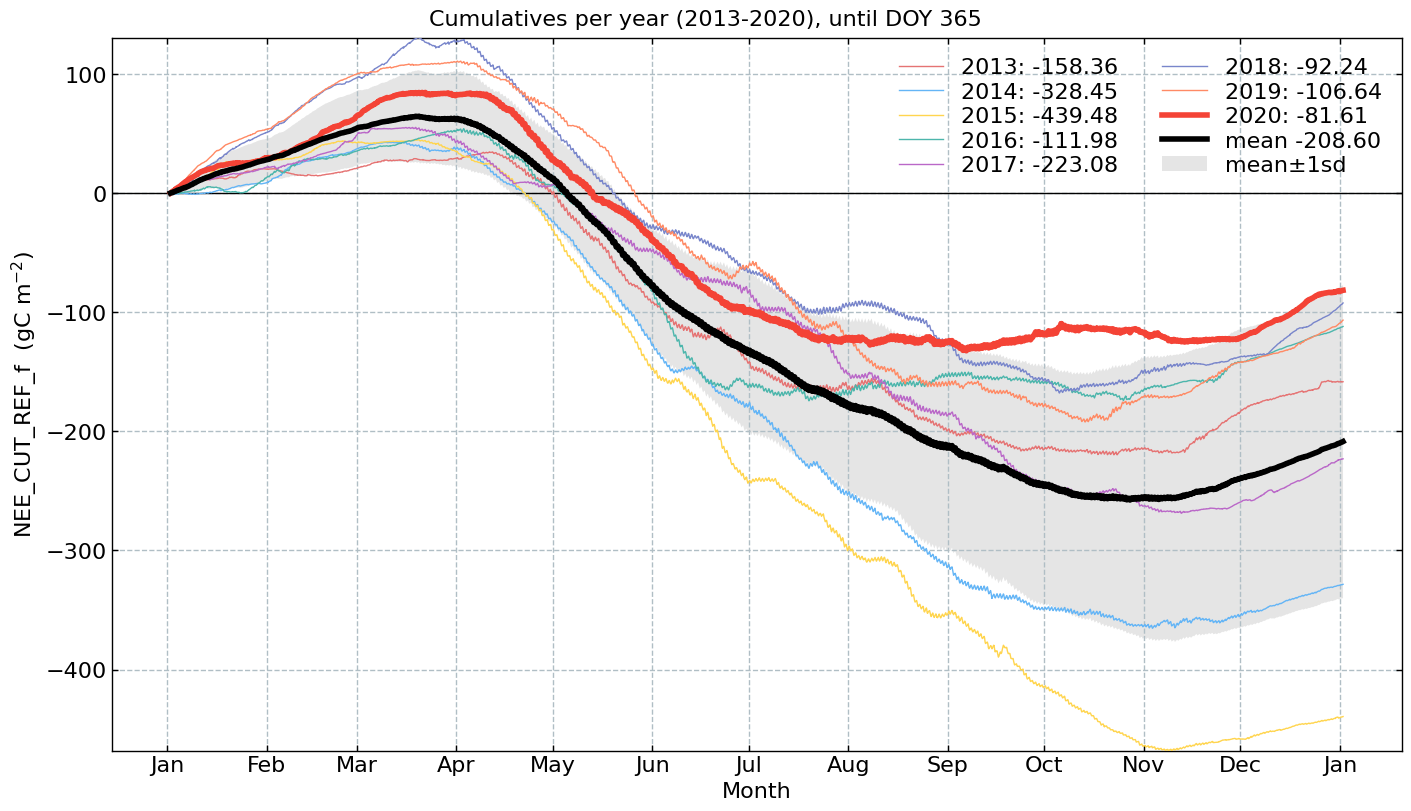

In [4]:
CumulativeYear(
    series=series,
    series_units=series_units,
    yearly_end_date=None,
    # yearly_end_date='08-11',
    start_year=2013,
    end_year=2020,
    show_reference=True,
    excl_years_from_reference=[2020],
    highlight_year=2020,
    highlight_year_color='#F44336').plot()

</br>

# **End of notebook**

In [5]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-25 01:41:11
